In [1]:
import numpy as np
import sounddevice as sd
import matplotlib.pylab as plt
from plot_setup import *
from continuously_signal import *
define_plots_settings()

# Aquisição do sinal - Entrada

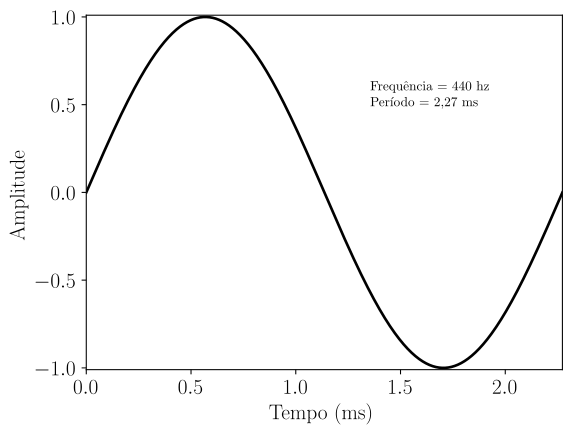

In [14]:
#Definição das características do sinal amostrado, frequência de amostragem e do sinal 
fs = 10000
fc = 440
time_sampling = 1/440 *2
t_cont, signal_cont = signal_simulation(time_sampling)
n_samples = np.arange(0,fs*time_sampling,1)
t_samp = (1/fs)*n_samples


Text(0, 0.5, 'Amplitude')

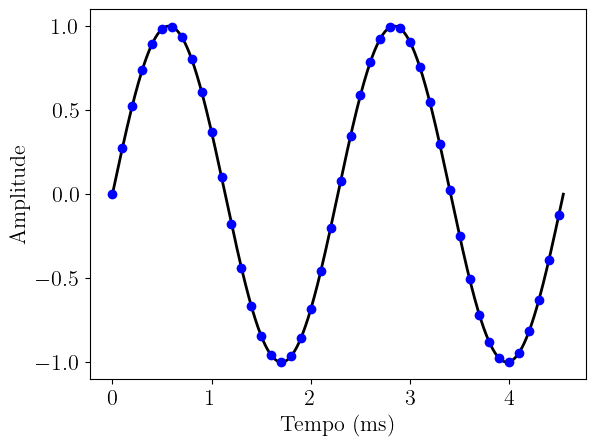

In [16]:
signal_samp = np.sin(2*np.pi*fc/fs*n_samples)
plt.plot(t_cont*1000, signal_cont,'k')
plt.plot(t_samp*1000, signal_samp,'ob')
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude")

In [8]:
fs2 = 8800
data2 = np.sin(2*np.pi*fc/fs2*n)
plt.plot(n,data2)

(0.0, 0.09988636363636363, -1.01, 1.01)

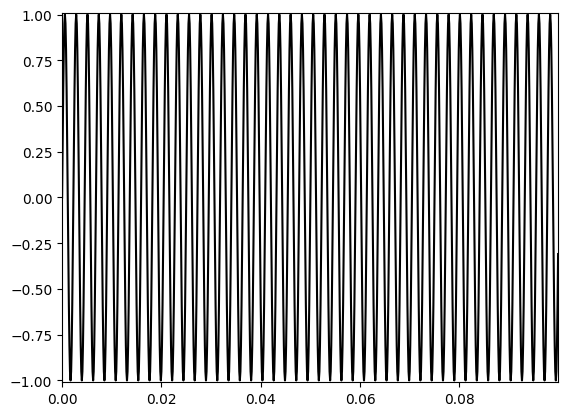

In [26]:
data2 = np.sin(2*np.pi*fc/8800*n)
t = 1/8800*n
plt.plot(t,data2,'k')
plt.axis([0,,-1.01,1.01])

In [28]:
1/440

0.0022727272727272726